In [1]:
import Veg_meanderpy_ESPIn2023 as mp
import matplotlib.pyplot as plt
import numpy as np
from landlab import HexModelGrid, RasterModelGrid
from landlab.plot.graph import plot_graph

## Input parameters

In [2]:
nit = 2000                   # number of iterations
W = 200.0                    # channel width (m)
D = 6.0  

# channel depth (m)
depths = D * np.ones(nit,)  # channel depths for different iterations  
pad = 100                    # padding (number of nodepoints along centerline)
deltas = 50.0                # sampling distance along centerline 
kl = 60.0/(365*24*60*60.0) # migration rate constant (m/s)

# Cfs now gets updated in meanderpy.py
Cfs = np.ones((nit,)) # dimensionless Chezy friction factor
#
Cfs_south = 0.011
Cfs_north = 0.03


crdist = 2 * W               # threshold distance at which cutoffs occur
kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
dt = 2*0.05*365*24*60*60.0     # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 20                # which time steps will be saved
n_bends = 30                 # approximate number of bends you want to model
Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
t1 = 500                    # time step when incision starts
t2 = 700                    # time step when lateral migration starts
t3 = 1200                    # time step when aggradation starts
aggr_factor = 2e-9         # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3)

## Initialize model

In [3]:
ch = mp.generate_initial_channel(W, depths[0], Sl, deltas, pad, n_bends) # initialize channel
chb = mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[]) # create channel belt object

In [4]:
len(ch.x)

711

### Creating our vegetation grid

In [5]:
print(random_range)

NameError: name 'random_range' is not defined

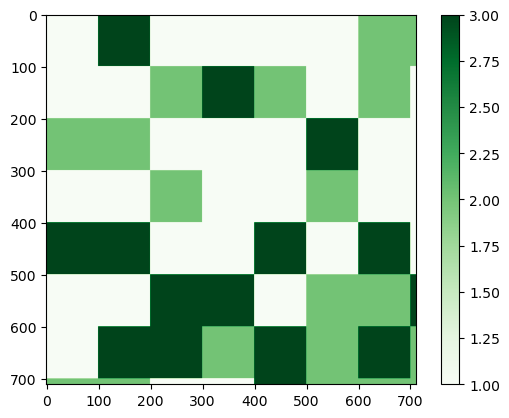

In [12]:
# Since we want vegetation patches: 

patch_size = int(deltas*2)
random_range = [1, 2, 3]  # Values representing different vegetation types (just 3)

# Generate random values
patched_veg = np.zeros((len(ch.x), len(ch.y)))

for i in range(0, len(ch.y), patch_size):
    for j in range(0, len(ch.x), patch_size):
        value = np.random.choice(random_range)  # Pick a random value from the vegetation types
        patched_veg[i:i+patch_size, j:j+patch_size] = value

# Create a heatmap
plt.imshow(patched_veg, cmap='Greens')
plt.colorbar()

# Show the plot
plt.show()

## Run simulation

In [13]:
# run one step 
chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor,Cfs_south,Cfs_north)

100%|██████████| 2000/2000 [00:52<00:00, 37.89it/s]

The sinuosity is: 2.05573580739


In [14]:
len(ch.x)

711

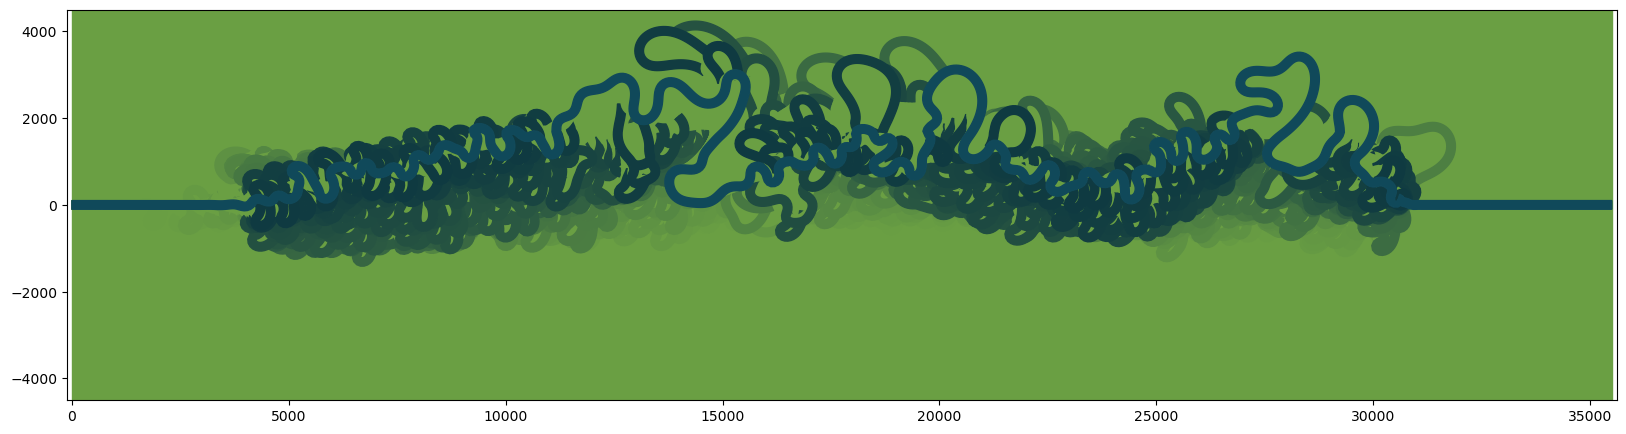

In [15]:
#chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor,Cfs_south,Cfs_north) # channel migration
# make migrate function 
fig = chb.plot('morph', 0, len(chb.cutoffs), chb.cl_times[-1], 1) # plotting

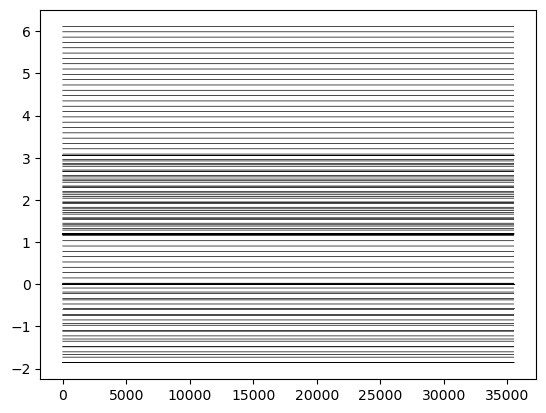

In [16]:
# check the z-profiles (to see whether there is the right amount of incision/aggradation):
plt.figure()
for channel in chb.channels:
    plt.plot(channel.x, channel.z, 'k', linewidth=0.5)

In [ ]:
chb.sinuosity

Create a "geomorphologic" display that takes into account that older point bars and cutoffs are covered by vegetation:

In [ ]:
fig = chb.plot('morph', 20, 60, chb.cl_times[-1], len(chb.channels))

Create a map that is colored by the age of the point bars:

In [ ]:
fig = chb.plot('age', 20, 60, chb.cl_times[-1], len(chb.channels))

## Create movie

In [ ]:
dirname = '/home/jupyter-corank18@wfu.edu/meanderpy/'
chb.create_movie(xmin=10000, xmax=30000, plot_type='strat', filename='movie', dirname=dirname,
                 pb_age = 1, ob_age = 20, end_time = chb.cl_times[-1], n_channels = len(chb.channels))

## Build 3D fluvial model

### Non-interactive definition of x- and y-extent

If the parameters 'xmin', 'xmax', ymin', and 'ymax' are non-zero (as in the cell below), they will be used to define the extent of the area of interest used to build the 3D model. At least initially, it is a good idea to keep this segment relatively small (only a few bends long) to avoid building very large models.

In [ ]:
plt.close('all')

In [ ]:
h_mud = 1.0 * np.ones((len(chb.channels),)) # thickness of overbank deposit for each time step
dx = 10.0 # gridcell size in meters
diff_scale = 2.0 * W/dx
v_coarse = 10.0 # deposition rate of coarse overbank sediment, in m/year (excluding times of no flooding)
v_fine = 0.0 # deposition rate of fine overbank sediment, in m/year (excluding times of no flooding)

chb_3d, xmin, xmax, ymin, ymax, dists, zmaps = mp.build_3d_model(chb, 'fluvial', 
            h_mud=h_mud, h=12.0, w=W, 
            bth=0.0, dcr=10.0, dx=dx, delta_s=deltas, dt=dt, starttime=chb.cl_times[0], endtime=chb.cl_times[-1],
            diff_scale=diff_scale, v_fine=v_fine, v_coarse=v_coarse, 
            xmin=9000, xmax=15000, ymin=-3500, ymax=3500)

In [2]:
# create plots
fig1,fig2,fig3 = chb_3d.plot_xsection(200, [[0.9,0.9,0],[0.5,0.25,0]], 4)

NameError: name 'chb_3d' is not defined

## Build fluvial model with variable depths and well-defined scrolls

In [ ]:
nit = 2000                   # number of iterations
W = 200.0                    # channel width (m)
D = 6.0
saved_ts = 20                # which time steps will be saved# channel depth (m)
# create variable depth sequence:
depths = D * np.ones((nit,)) + np.repeat(1.5*(np.random.random_sample(int(nit/saved_ts))-0.5), saved_ts)
pad = 100                    # padding (number of nodepoints along centerline)
deltas = 50.0                # sampling distance along centerline           
Cfs = 0.011 * np.ones((nit,)) # dimensionless Chezy friction factor
crdist = 2 * W               # threshold distance at which cutoffs occur
kl = 60.0/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
dt = 2*0.05*365*24*60*60.0     # time step (s)
dens = 1000                  # density of water (kg/m3)
n_bends = 30                 # approximate number of bends you want to model
Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
t1 = 500                    # time step when incision starts
t2 = 900                    # time step when lateral migration starts
t3 = 10000                    # time step when aggradation starts
aggr_factor = 2e-9         # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3)

ch = mp.generate_initial_channel(W, depths[0], Sl, deltas, pad, n_bends) # initialize channel
chb = mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[]) # create channel belt object

chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
fig = chb.plot('strat', 20, 60, chb.cl_times[-1], len(chb.channels)) # plotting

In [ ]:
# add a bit more incision:
for i in range(len(chb.channels)):
    chb.channels[i].z = np.ones(np.shape(chb.channels[i].x))*(-0.1 * i)
# create 'h_mud' sequence that mimicks the varibaility in depth through time:
depths1 = depths[::saved_ts]
depths1 = np.hstack((depths1[0], depths1))
h_mud = depths1 - 5.0 # maximum thickness of overbank deposit for each time step
dx = 10.0 # gridcell size in meters
# reduce diffusion length scale:
diff_scale = 1.0 * W/dx
# increase deposition rate of coares sediment:
v_coarse = 20.0 # deposition rate of coarse overbank sediment, in m/year (excluding times of no flooding)
v_fine = 0.0 # deposition rate of fine overbank sediment, in m/year (excluding times of no flooding)

chb_3d, xmin, xmax, ymin, ymax, dists, zmaps = mp.build_3d_model(chb, 'fluvial', 
            h_mud=h_mud, h=12.0, w=W, 
            bth=0.0, dcr=10.0, dx=dx, delta_s=deltas, dt=dt, starttime=chb.cl_times[0], endtime=chb.cl_times[-1],
            diff_scale=diff_scale, v_fine=v_fine, v_coarse=v_coarse, 
            xmin=8000, xmax=15000, ymin=-3500, ymax=3500)

# create plots
fig1,fig2,fig3 = chb_3d.plot_xsection(200, [[0.9,0.9,0],[0.5,0.25,0]], 4)

## Interactive definition of x- and y-extent
After you run the next cell, you need to select the upper left and lower right corners of the area of interest for which you want to build a 3D model. At least initially, it is a good idea to keep this segment relatively small (only a few bends long) to avoid building very large models. The area will only be highlighted (as a red rectangle) after the 3d model building has finished.

In [ ]:
chb_3d, xmin, xmax, ymin, ymax, dists, zmaps = mp.build_3d_model(chb, 'fluvial', 
            h_mud=h_mud, h=12.0, w=W, 
            bth=0.0, dcr=10.0, dx=dx, delta_s=deltas, dt=dt, starttime=chb.cl_times[0], endtime=chb.cl_times[-1],
            diff_scale=diff_scale, v_fine=v_fine, v_coarse=v_coarse, 
            xmin=0, xmax=0, ymin=0, ymax=0)

In [ ]:
# create plots
fig1,fig2,fig3 = chb_3d.plot_xsection(200, [[0.9,0.9,0],[0.5,0.25,0]], 4)

## Build 3D submarine channel model

In [ ]:
nit = 2000                   # number of iterations
W = 200.0                    # channel width (m)
D = 6.0                      # channel depth (m)
depths = D * np.ones((nit,))  # channel depths for different iterations  
pad = 50                    # padding (number of nodepoints along centerline)
deltas = W/4                # sampling distance along centerline           
Cfs = 0.011 * np.ones((nit,)) # dimensionless Chezy friction factor
crdist = 1.5 * W               # threshold distance at which cutoffs occur
kl = 60.0/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
dt = 2*0.05*365*24*60*60.0     # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 20                # which time steps will be saved
n_bends = 30                 # approximate number of bends you want to model
Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
t1 = 500                    # time step when incision starts
t2 = 700                    # time step when lateral migration starts
t3 = 1300                    # time step when aggradation starts
aggr_factor = 2e-8         # aggradation factor 

In [ ]:
ch = mp.generate_initial_channel(W, depths[0], Sl, deltas, pad, n_bends) # initialize channel
chb = mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[]) # create channel belt object

In [ ]:
chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
fig = chb.plot('strat',20,60,chb.cl_times[-1],len(chb.channels)) # plotting

In [ ]:
# check the z-profiles (to see whether there is the right amount of incision/aggradation):
plt.figure()
for channel in chb.channels:
    plt.plot(channel.x, channel.z, 'k', linewidth=0.5)

### Interactive definition of x- and y-extent
After you run the next cell, you need to select the upper left and lower right corners of the area of interest for which you want to build a 3D model. At least initially, it is a good idea to keep this segment relatively small (only a few bends long) to avoid building very large models. The area will only be highlighted (as a red rectangle) after the 3d model building has finished.

In [ ]:
h_mud = 4.0 * np.ones((len(chb.cl_times),)) # thickness of overbank deposit for each time step
dx = 10.0 # gridcell size in meters
diff_scale = 3 * W/dx
v_coarse = 4.0 # deposition rate of coarse overbank sediment, in m/year (excluding times of no flow in channel)
v_fine = 0.0 # deposition rate of fine overbank sediment, in m/year (excluding times of no flow in channel)

chb_3d, xmin, xmax, ymin, ymax, dists, zmaps = mp.build_3d_model(chb, 
            'submarine', h_mud=h_mud, h=15.0, w=W, 
            bth=4.0, dcr=6.0, dx=dx, delta_s=deltas, dt=dt, starttime=chb.cl_times[0], endtime=chb.cl_times[-1],
            diff_scale=diff_scale, v_fine=v_fine, v_coarse=v_coarse, 
            xmin=0, xmax=0, ymin=0, ymax=0)
#             xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)


In [ ]:
fig1,fig2,fig3 = chb_3d.plot_xsection(200, [[0.9,0.9,0], [0.5,0.25,0]], 10)

## Build submarine channel model with along-channel slope

In [ ]:
nit = 2000                   # number of iterations
W = 200.0                    # channel width (m)
D = 6.0                      # channel depth (m)
depths = D * np.ones((nit,))  # channel depths for different iterations  
pad = 50                    # padding (number of nodepoints along centerline)
deltas = W/4                # sampling distance along centerline           
Cfs = 0.011 * np.ones((nit,)) # dimensionless Chezy friction factor
crdist = 1.5 * W               # threshold distance at which cutoffs occur
kl = 60.0/(365*24*60*60.0)   # migration rate constant (m/s)
kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
dt = 2*0.05*365*24*60*60.0     # time step (s)
dens = 1000                  # density of water (kg/m3)
saved_ts = 20                # which time steps will be saved
n_bends = 30                 # approximate number of bends you want to model
Sl = 0.01                     # initial slope (matters more for submarine channels than rivers)
t1 = 500                    # time step when incision starts
t2 = 700                    # time step when lateral migration starts
t3 = 1300                    # time step when aggradation starts
aggr_factor = 4        # aggradation factor 

ch = mp.generate_initial_channel(W, depths[0], Sl, deltas, pad, n_bends) # initialize channel
chb = mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[]) # create channel belt object

chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
fig = chb.plot('strat',20,60,chb.cl_times[-1],len(chb.channels)) # plotting

In [ ]:
# check the z-profiles (to see whether there is the right amount of incision/aggradation):
plt.figure()
for channel in chb.channels:
    plt.plot(channel.x, channel.z, 'k', linewidth=0.5)

In [ ]:
h_mud = 4.0 * np.ones((len(chb.cl_times),)) # thickness of overbank deposit for each time step
dx = 10.0 # gridcell size in meters
diff_scale = 3 * W/dx
v_coarse = 4.0 # deposition rate of coarse overbank sediment, in m/year (excluding times of no flow in channel)
v_fine = 0.0 # deposition rate of fine overbank sediment, in m/year (excluding times of no flow in channel)

chb_3d, xmin, xmax, ymin, ymax, dists, zmaps = mp.build_3d_model(chb, 
            'submarine', h_mud=h_mud, h=15.0, w=W, 
            bth=4.0, dcr=6.0, dx=dx, delta_s=deltas, dt=dt, starttime=chb.cl_times[0], endtime=chb.cl_times[-1],
            diff_scale=diff_scale, v_fine=v_fine, v_coarse=v_coarse, 
            xmin=0, xmax=0, ymin=0, ymax=0)

In [ ]:
fig1,fig2,fig3 = chb_3d.plot_xsection(200, [[0.9,0.9,0], [0.5,0.25,0]], 10)